In [341]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import datetime
import pandas as pd
from sklearn.metrics import classification_report

DIRECTORY = r'C:\Users\User\Desktop'
CATEGORIES = ['cat','dog']

data = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (60, 60))
        data.append([new_arr, label])

In [342]:
import random

random.shuffle(data)

X = []
y = []


for features, label in data:
    X.append(features)
    y.append(label)
    

X = np.array(X)
y = np.array(y)

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.45,random_state = 2)

In [344]:
# What does image look like in array
X_train[0]

array([[[ 95, 136, 151],
        [ 83, 126, 158],
        [ 80, 114, 134],
        ...,
        [141, 182, 197],
        [ 64, 107, 116],
        [ 74, 117, 125]],

       [[120, 165, 179],
        [122, 166, 192],
        [155, 195, 214],
        ...,
        [ 42,  89, 102],
        [ 65, 105, 118],
        [142, 182, 195]],

       [[164, 210, 224],
        [157, 196, 215],
        [162, 202, 217],
        ...,
        [136, 180, 192],
        [183, 218, 233],
        [ 81, 117, 132]],

       ...,

       [[249, 252, 253],
        [187, 195, 198],
        [225, 250, 254],
        ...,
        [132, 181, 202],
        [ 93, 138, 161],
        [148, 194, 216]],

       [[228, 234, 235],
        [244, 254, 254],
        [220, 250, 253],
        ...,
        [104, 160, 185],
        [115, 164, 186],
        [ 86, 136, 158]],

       [[214, 234, 233],
        [227, 251, 251],
        [ 75, 117, 119],
        ...,
        [110, 166, 185],
        [119, 175, 197],
        [113, 169, 190]]

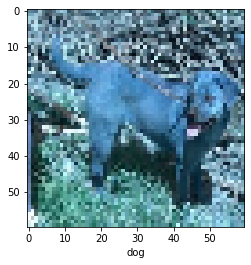

In [345]:
#What does Image look like?
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.xlabel(CATEGORIES[y_train[0]])
plt.show()

In [346]:
# Normalizing Data
X_train = X_train/255
X_test = X_test/255

#from sklearn import preprocessing

#scaler = preprocessing.StandardScaler().fit(X)
#X = scaler.transform(X)
#X

#nsamples, nx, ny = X.shape
#X = X.reshape((nsamples,nx*ny))

In [347]:
#Test on ANN first
begin_time = datetime.datetime.now()

modelANN = models.Sequential([
    layers.Flatten(input_shape =(60,60,3)),
    layers.Dense(100,activation='relu'),
    layers.Dense(30,activation='relu'),
    layers.Dense(2,activation='softmax')
])

modelANN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
modelANN.fit(X_train,y_train,epochs=10)

print(datetime.datetime.now() - begin_time)

Epoch 1/10
430/430 [==============================] - 9s 19ms/step - loss: 0.8024 - accuracy: 0.5373 2s - loss: 0.8307 -  - - ETA: 0s - loss: 0
Epoch 2/10
430/430 [==============================] - 8s 20ms/step - loss: 0.6895 - accuracy: 0.5674
Epoch 3/10
430/430 [==============================] - 8s 19ms/step - loss: 0.6773 - accuracy: 0.5761
Epoch 4/10
430/430 [==============================] - 8s 20ms/step - loss: 0.6622 - accuracy: 0.6058 2s - E
Epoch 5/10
430/430 [==============================] - 8s 19ms/step - loss: 0.6565 - accuracy: 0.6120 7s - loss: 0.6467 - accuracy - ETA: 6s - loss: 0.6485 - accuracy - ETA: 6s - l - ETA: 5s - loss: 0.6549 - ac - ETA: 5s - loss: 0.6 - ETA: 4s - loss: 0.6578 - accuracy: 0.61 - ETA: 4s - loss: 0.6579 -  - ETA: 4s - loss: 0.6581 - ac - ETA: 3s - loss: 0.6581 - accuracy - ETA: 3s - - ETA: 1s - loss: 0.6572 - accuracy
Epoch 6/10
430/430 [==============================] - 8s 19ms/step - loss: 0.6525 - accuracy: 0.6141 2s - loss: 0.6523 - accuracy 

In [348]:

modelANN.evaluate(X_test,y_test)
y_pred = modelANN.predict(X_test)

df = []
catDog = [0,1]
for i in range(len(X_test)):
    df.append(catDog[np.argmax(y_pred[i])])

y_pred = df    
print(classification_report(y_test,y_pred))

352/352 [==============================] - 6s 15ms/step - loss: 0.6626 - accuracy: 0.5972 2s - l
              precision    recall  f1-score   support

           0       0.56      0.84      0.68      5612
           1       0.69      0.35      0.47      5638

    accuracy                           0.60     11250
   macro avg       0.63      0.60      0.57     11250
weighted avg       0.63      0.60      0.57     11250



In [ ]:
# Check What Pictures We Got Wrong

In [350]:
# Now adding Convolution and Pooling Layers onto ANN 
# Convolution does most of the work? Don't need as many hidden networks?

begin_time = datetime.datetime.now()

modelCNN = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3,3),activation = 'relu', input_shape=(60,60,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dense(30,activation='relu'),
    layers.Dense(2,activation='softmax')
])
modelCNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
modelCNN.fit(X_train,y_train,epochs=10)

print(datetime.datetime.now() - begin_time)

Epoch 1/10
430/430 [==============================] - 37s 85ms/step - loss: 0.6588 - accuracy: 0.6104
Epoch 2/10
430/430 [==============================] - 36s 84ms/step - loss: 0.5010 - accuracy: 0.7534
Epoch 3/10
430/430 [==============================] - 36s 84ms/step - loss: 0.4391 - accuracy: 0.7976
Epoch 4/10
430/430 [==============================] - 36s 84ms/step - loss: 0.3617 - accuracy: 0.8368
Epoch 5/10
430/430 [==============================] - 36s 84ms/step - loss: 0.2870 - accuracy: 0.87831s - los
Epoch 6/10
430/430 [==============================] - 36s 84ms/step - loss: 0.1932 - accuracy: 0.92380s - loss: 0
Epoch 7/10
430/430 [==============================] - 37s 86ms/step - loss: 0.1212 - accuracy: 0.9577
Epoch 8/10
430/430 [==============================] - 36s 84ms/step - loss: 0.0753 - accuracy: 0.9754
Epoch 9/10
430/430 [==============================] - 36s 84ms/step - loss: 0.0492 - accuracy: 0.9849
Epoch 10/10
430/430 [==============================] - 36s 85m

In [351]:
modelCNN.evaluate(X_test,y_test)

352/352 [==============================] - 13s 37ms/step - loss: 1.3744 - accuracy: 0.7296


[1.374426245689392, 0.7296000123023987]

In [239]:
# Remove Hidden Layer

begin_time = datetime.datetime.now()

modelCNN1 = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3,3),activation = 'relu', input_shape=(60,60,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(30,activation='relu'),
    layers.Dense(2,activation='softmax')
])
modelCNN1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
modelCNN1.fit(X_train,y_train,epochs=10)

print(datetime.datetime.now() - begin_time)

Epoch 1/10
547/547 [==============================] - 32s 58ms/step - loss: 0.6408 - accuracy: 0.6446
Epoch 2/10
547/547 [==============================] - 32s 58ms/step - loss: 0.4969 - accuracy: 0.75620s - loss: 0.496
Epoch 3/10
547/547 [==============================] - 32s 58ms/step - loss: 0.4381 - accuracy: 0.79501s - loss: 0.4 - ETA: 0s - loss: 0.4380 
Epoch 4/10
547/547 [==============================] - 32s 58ms/step - loss: 0.3777 - accuracy: 0.8303
Epoch 5/10
547/547 [==============================] - 32s 58ms/step - loss: 0.3206 - accuracy: 0.8623
Epoch 6/10
547/547 [==============================] - 32s 58ms/step - loss: 0.2587 - accuracy: 0.8952
Epoch 7/10
547/547 [==============================] - 32s 58ms/step - loss: 0.2111 - accuracy: 0.91780s - loss: 0.2111 - ac
Epoch 8/10
547/547 [==============================] - 32s 58ms/step - loss: 0.1591 - accuracy: 0.9406
Epoch 9/10
547/547 [==============================] - 32s 58ms/step - loss: 0.1137 - accuracy: 0.9627
Epoc

In [240]:
modelCNN1.evaluate(X_test,y_test)

235/235 [==============================] - 4s 17ms/step - loss: 0.9664 - accuracy: 0.7353


[0.9664469957351685, 0.7353333234786987]

In [352]:
# Increase Kernel Size and Max Pooling

begin_time = datetime.datetime.now()

modelCNN2 = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(8,8),activation = 'relu', input_shape=(60,60,3)),
    layers.MaxPooling2D((3,3)),
    layers.Flatten(),
    layers.Dense(30,activation='relu'),
    layers.Dense(2,activation='softmax')
])
modelCNN2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
modelCNN2.fit(X_train,y_train,epochs=10)

print(datetime.datetime.now() - begin_time)

Epoch 1/10
430/430 [==============================] - 62s 143ms/step - loss: 0.7006 - accuracy: 0.5304
Epoch 2/10
430/430 [==============================] - 61s 142ms/step - loss: 0.6437 - accuracy: 0.6256
Epoch 3/10
430/430 [==============================] - 61s 142ms/step - loss: 0.5995 - accuracy: 0.6823
Epoch 4/10
430/430 [==============================] - 61s 142ms/step - loss: 0.5435 - accuracy: 0.7268
Epoch 5/10
430/430 [==============================] - 61s 142ms/step - loss: 0.4881 - accuracy: 0.7585
Epoch 6/10
430/430 [==============================] - 61s 142ms/step - loss: 0.4253 - accuracy: 0.7950
Epoch 7/10
430/430 [==============================] - 61s 142ms/step - loss: 0.3583 - accuracy: 0.8352
Epoch 8/10
430/430 [==============================] - 61s 142ms/step - loss: 0.2789 - accuracy: 0.8791
Epoch 9/10
430/430 [==============================] - 61s 142ms/step - loss: 0.2169 - accuracy: 0.9096
Epoch 10/10
430/430 [==============================] - 61s 142ms/step - l

In [242]:
modelCNN2.evaluate(X_test,y_test)

235/235 [==============================] - 7s 31ms/step - loss: 0.8434 - accuracy: 0.6923


[0.8433930277824402, 0.6922666430473328]

In [353]:
# Less filters

begin_time = datetime.datetime.now()

modelCNN3 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation = 'relu', input_shape=(60,60,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3),activation = 'relu', input_shape=(60,60,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3),activation = 'relu', input_shape=(60,60,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(2,activation='softmax')
])
modelCNN3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
modelCNN3.fit(X_train,y_train,epochs=5)

print(datetime.datetime.now() - begin_time)


Epoch 1/5
430/430 [==============================] - 123s 283ms/step - loss: 0.6936 - accuracy: 0.5413
Epoch 2/5
430/430 [==============================] - 121s 281ms/step - loss: 0.5961 - accuracy: 0.6872
Epoch 3/5
430/430 [==============================] - 121s 280ms/step - loss: 0.5062 - accuracy: 0.7489
Epoch 4/5
430/430 [==============================] - 121s 280ms/step - loss: 0.4332 - accuracy: 0.7964
Epoch 5/5
430/430 [==============================] - 121s 281ms/step - loss: 0.3728 - accuracy: 0.8273
0:10:05.840238


In [354]:
modelCNN3.evaluate(X_test,y_test)

352/352 [==============================] - 38s 106ms/step - loss: 0.4808 - accuracy: 0.7688


[0.48083898425102234, 0.7688000202178955]

In [355]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img,(60, 60))
        if img is not None:
            
            images.append(img)
    return images
folder= r'C:\Users\User\Desktop\test'
data = load_images_from_folder(folder)

In [356]:
X_test = []

for features in data:
    X_test.append(features)
    

X_test = np.array(X_test)

# Normalize
X_test = X_test/255

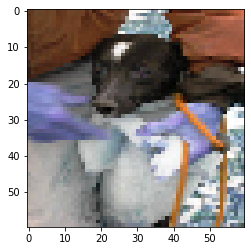

In [357]:
X_test = X_test.reshape(12500,60,60,3)
plt.imshow(X_test[0],cmap=plt.cm.binary)
plt.show()

In [358]:
# Model 4 (2 Convolutinal layers)
KagglePred = modelCNN3.predict(X_test)

df = []
catDog = [0,1]
for i in range(len(X_test)):
    df.append(KagglePred[i][1])
    
pd.DataFrame(df).to_csv('Model4.csv')

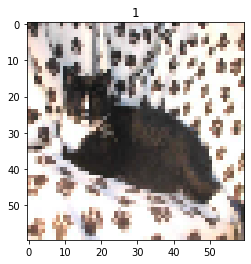

0.6053018

In [364]:
plt.imshow(X_test[5554],cmap=plt.cm.binary)
plt.title(catDog[np.argmax(KagglePred[5554])])
plt.show()
display(KagglePred[5554][1])

In [215]:
# Model 3 (1 Convolutinal layer)
KagglePred = modelCNN2.predict(X_test)

df = []
catDog = [0,1]
for i in range(len(X_test)):
    df.append(catDog[np.argmax(KagglePred[i])])
    
pd.DataFrame(df).to_csv('Model3.csv')

In [216]:
# Model 2 (1 Hidden Layer layer)
KagglePred = modelCNN1.predict(X_test)

df = []
catDog = [0,1]
for i in range(len(X_test)):
    df.append(catDog[np.argmax(KagglePred[i])])
    
pd.DataFrame(df).to_csv('Model2.csv')

In [256]:
# Model 1 (1 Hidden Layer layer)
KagglePred = modelCNN.predict(X_test)

df = []
catDog = [0,1]
for i in range(len(X_test)):
    df.append(catDog[np.argmax(KagglePred[i])])
    
pd.DataFrame(df).to_csv('Model1.csv')

In [305]:
# Model ANN 
KagglePred = modelANN.predict(X_test)

df = []
catDog = [0,1]
for i in range(len(X_test)):
    df.append(catDog[np.argmax(KagglePred[i])])
    
pd.DataFrame(df).to_csv('ModelANN.csv')

In [ ]:
# TRY 2 MODELS WITH MORE PIXELS

In [221]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import datetime
import pandas as pd

DIRECTORY = r'C:\Users\User\Desktop'
CATEGORIES = ['cat','dog']

data = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (80, 80))
        data.append([new_arr, label])

In [222]:
random.shuffle(data)

X = []
y = []


for features, label in data:
    X.append(features)
    y.append(label)
    

X = np.array(X)
y = np.array(y)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

# Normalizing Data
X_train = X_train/255
X_test = X_test/255

In [224]:
#Test on ANN first
begin_time = datetime.datetime.now()

modelANN = models.Sequential([
    layers.Flatten(input_shape =(80,80,3)),
    layers.Dense(100,activation='relu'),
    layers.Dense(30,activation='relu'),
    layers.Dense(2,activation='softmax')
])

modelANN.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
modelANN.fit(X_train,y_train,epochs=10)

print(datetime.datetime.now() - begin_time)

Epoch 1/10
547/547 [==============================] - 25s 37ms/step - loss: 0.6960 - accuracy: 0.5325
Epoch 2/10
547/547 [==============================] - 20s 37ms/step - loss: 0.6622 - accuracy: 0.6011
Epoch 3/10
547/547 [==============================] - 20s 36ms/step - loss: 0.6469 - accuracy: 0.6195
Epoch 4/10
547/547 [==============================] - 19s 35ms/step - loss: 0.6419 - accuracy: 0.6239
Epoch 5/10
547/547 [==============================] - 20s 36ms/step - loss: 0.6350 - accuracy: 0.6394
Epoch 6/10
547/547 [==============================] - 20s 36ms/step - loss: 0.6294 - accuracy: 0.6375
Epoch 7/10
547/547 [==============================] - 20s 36ms/step - loss: 0.6205 - accuracy: 0.6501
Epoch 8/10
547/547 [==============================] - 20s 36ms/step - loss: 0.6204 - accuracy: 0.6433
Epoch 9/10
547/547 [==============================] - 20s 36ms/step - loss: 0.6108 - accuracy: 0.6591
Epoch 10/10
547/547 [==============================] - 20s 36ms/step - loss: 0.604

In [225]:
modelANN.evaluate(X_test,y_test)

235/235 [==============================] - 8s 32ms/step - loss: 0.6317 - accuracy: 0.6352


[0.631732702255249, 0.635200023651123]

In [227]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img,(80, 80))
        if img is not None:
            
            images.append(img)
    return images
folder= r'C:\Users\User\Desktop\test'
data = load_images_from_folder(folder)


X_test = []

for features in data:
    X_test.append(features)
    

X_test = np.array(X_test)
X_test = X_test.reshape(12500,80,80,3)

# Normalize
X_test = X_test/255

In [228]:
# Model ANN 
KagglePred = modelANN.predict(X_test)

df = []
catDog = [0,1]
for i in range(len(X_test)):
    df.append(catDog[np.argmax(KagglePred[i])])
    
pd.DataFrame(df).to_csv('ModelANN.csv')